# Tokenização e Stemming para a coleção obtida de artigos do site Carta Capital

## Importando-se os pacotes necessários para a atividade

In [7]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import nltk
from unicodedata import normalize
from collections import Counter, OrderedDict
from nltk.stem import RSLPStemmer

'import nltk\nfrom unicodedata import normalize\nfrom collections import Counter, OrderedDict\nfrom nltk.stem import RSLPStemmer'

## Obtendo-se Tokens dos textos dos artigos

In [9]:
# Nesta parte, obtém-se o data frame do csv, o qual contém o texto dos artigos do site Carta Capital. A partir do data frame
# coleta-se os textos e cria-se uma lista de palavras presentes nos textos, as quais ainda não estão sendo tratados técnicas de
# tokenização para melhorar eficiência e qualidade da busca, mas apenas são salvas todas as palvras encontradas.

def concatena_textos(textos, texto):
    """
        Concatena-se todos os textos em um único texto.
    """
    return textos + str(texto).split(" ")

data_frame = pd.read_csv("results.csv")
textos_artigos = data_frame["text"].tolist()

palavras = reduce(concatena_textos, textos_artigos, [])

## Questão 1

In [10]:
# Nesta seção busco usar técnicas de tokenização para melhorar a eficiência e qualidade da busca. Como técnicas, adotei:
#
#     - Substituição de palavras maiúsculas por minúsculas, evitando a distinção de palavras como: Bolsonaro e bolsonaro.
#
#     - Exclusão de símbolos de pontuações típicos no português, pois os mesmos não são, na maioria das vezes, cruciais em
#       uma busca. Por exemplo, ao deparar-se com uma palavra que é constítuida apenas por "?", a mesma é excluído da lista de
#       índices, pois não auxiliará de forma eficiente na busca. Enquanto que as palavras "nada!" e "I.B.M", também contém
#       pontuações, não obstante, não pode-se eliminar a palavra como todo, mas apenas suas pontuações, transformando estas
#       palavras em "nada" e "IBM".
#
#     - Remoção de acentuações. A acentuação está muito presente no vocabulário do português, no entanto, o uso ou não desta
#       acentuação não deve ser crucial na busca, pois o objetivo da acentuação é puramente fonético, então a palavra "não" e
#       "nao" são tratadas como equivalentes, assim como "observação" e "observacao".
#
#     - Remoção de palavras com apenas uma letra. Palavras como "a", "b" e "o", fazem pouca diferença na busca de um usuário,
#       ou seja, não são cruciais, logo, eu as excluí. Não obstante, palavras com duas ou três letras não foram excluídas, pois
#       as mesmas podem apresentar um contexto importante, como a sigla "PM" para "Polícia Militar".
#
# OBS: Não eliminei números, pois para o contexto do site Carta Capital, número representam anos ou porcentagens, os quais
#      são bem representativos para uma busca.

def substitui_letras_maiusculas(token):
    """
        Substitui letras maiúsculas por minúsculas do token.
    """
    return token.lower()

def mapeia_letras_maiusculas(tokens):
    """
        Substitui as letras maiúsculas dos tokens por minúsculas.
    """
    return map(substitui_letras_maiusculas, tokens)
    
def is_not_pontuacao(token):
    """
        Retorna-se um booleano indicando se o token passado por parâmetro é uma pontuação.
    """
    lista_pontuacoes = [",", ".", "!", "?", ":", "/", "#", "*", "(", ")", ";", ""]
    return token.strip() not in lista_pontuacoes
    
def exclui_pontuacoes_token(token):
    """
        Exclui pontuações presentes nos tokens. Por exemplo, "P.M." torna-se "PM".
    """
    return re.sub(r'[,.!?:*();]', '', token)

def mapeia_tokens_sem_pontuacao(tokens):
    """
        Mapeia os tokens para não possuírem mais pontuações e os retorna.
    """
    tokens = filter(is_not_pontuacao, tokens)
    return map(exclui_pontuacoes_token, tokens)

def remove_acentuacoes(token):
    """
        Remove as acentuações de um token.
    """
    token_unicode = unicode(token, "utf-8")
    return normalize('NFKD', token_unicode).encode('ASCII','ignore')
    
def mapeia_tokens_sem_acentuacao(tokens):
    """
        Mapeia tokens para não possuírem acentuações. Por exemplo, "não" torna-se "nao".
    """
    return map(remove_acentuacoes, tokens)

def is_tamanho_maior_um(token):
    """
        Retorna um booleano indicando se a palavra tem mais de uma letra.
    """
    return len(token) > 1
    
def remove_tokens_uma_letra(tokens):
    """
        Remove palavras com apenas uma letra.
    """
    return filter(is_tamanho_maior_um, tokens)

tokens = mapeia_letras_maiusculas(palavras)
tokens = mapeia_tokens_sem_pontuacao(tokens)
tokens = mapeia_tokens_sem_acentuacao(tokens)
tokens = remove_tokens_uma_letra(tokens)

NameError: global name 'normalize' is not defined

## Questão 2

In [89]:
counter_tokens = Counter(tokens)

counter_tokens_ordenados_ocorrencia = counter_tokens.most_common()

# Obtém-se os 50 tokens mais frequentes
cinquenta_tokens_mais_frequentes = counter_tokens_ordenados_ocorrencia[0:50]

## Lista apenas com os tokens
nomes_tokens = [nome for nome, ocorrencia in cinquenta_tokens_mais_frequentes]

## Lista apenas com a ocorrência dos tokens
ocorrencias = [ocorrencia for nome, ocorrencia in cinquenta_tokens_mais_frequentes]

# Total de ocorrencia de palavras em todos os aritgos
total_ocorrencia_tokens = len(tokens)
ocorrencias_medias = map(lambda ocorrencia: float(ocorrencia) / total_ocorrencia_tokens, ocorrencias)

## Lista no intervalo de 1 a 50 para representar o raking das palavavras
ranking = range(1, 51)

## Lista com a ocorrência das palavras medidas em porcentagem
ocorrencias_porcentagem = map(lambda ocorrencia: round(ocorrencia * 100, 2), ocorrencias_medias)

## Lista do produto entre as ocorrências médias e o seus respectivos rankings
produto_pr_r = map(lambda (i, ocorrencia_media): round((i+1) * ocorrencia_media, 3), enumerate(ocorrencias_medias))

colunas = ["Word", "Freq.", "r", "Pr(%)", "r.Pr"]

tabela_questao_2 = pd.DataFrame({"Word": nomes_tokens, 
                                 "Freq.": ocorrencias,
                                 "r": ranking,
                                 "Pr(%)": ocorrencias_porcentagem,
                                 "r.Pr": produto_pr_r})
tabela_questao_2 = tabela_questao_2.reindex(columns=colunas)

tabela_questao_2

,Word,Freq.,r,Pr(%),r.Pr
0,de,11441,1,5.53,0.055
1,que,6085,2,2.94,0.059
2,do,4461,3,2.16,0.065
3,da,3911,4,1.89,0.076
4,em,3296,5,1.59,0.080
5,para,2536,6,1.23,0.074
6,um,2363,7,1.14,0.080
7,no,2105,8,1.02,0.081
8,nao,2062,9,1.00,0.090
9,uma,2013,10,0.97,0.097


## Questão 3

In [90]:
# Utilizei o stemming implementado pelo NLTK.
# Falsos positivos: onu, diss, pen, viol, grav, mort, divers, pec, ferr, prim.
# Falsos negativos: direit, human, pequen, cruel, muculm, difamaca, escrev, criminaliz, menin, orden.
#
# Em minha visão, alguns desses falsos positivos podem atrapalhar nossa busca. Por exemplo, utilizando-se uma busca por
# mortadela, todas os documentos com o stemming mort seriam encontrados, no entanto, documentos com palavras como morte e mortal
# também seriam encontrados, não fazendo-se jus a pesquisa. Enquanto que para o stemming para a palavra human, faz-se sentido,
# pois human pode ser considerado um radical para humano, humana, humanindade, dentre outras palavras com significados próximos.

nltk.download('rslp')

stemmer = RSLPStemmer()

stemming_tokens = map(lambda token: stemmer.stem(token), tokens)

stemming_tokens

[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\thayn\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


['em',
 u'entrev',
 'porta-voz',
 'do',
 u'alt',
 u'comissari',
 'da',
 'onu',
 u'par',
 'os',
 u'direit',
 u'human',
 u'ravin',
 u'shamdasan',
 u'diss',
 'que',
 u'ped',
 'ao',
 u'govern',
 'do',
 u'brun',
 u'pequen',
 u'sultanat',
 u'situ',
 'no',
 u'sud',
 u'asia',
 u'revisa',
 'do',
 u'nov',
 u'codig',
 u'penal\nsegund',
 'ela',
 u'pen',
 u'com',
 u'ess',
 u'aplic',
 u'atual',
 'sao',
 u'cruel',
 u'desum',
 u'viol',
 u'grav',
 u'direit',
 u'internac',
 'os',
 u'direit',
 u'human',
 u'est',
 'por',
 u'exempl',
 u'cas',
 'da',
 u'mort',
 'por',
 u'lapidaca',
 'que',
 u'dev',
 u'entr',
 'em',
 u'vig',
 'na',
 u'quarta-f',
 u'estipul',
 u'pen',
 'de',
 u'mort',
 u'par',
 u'estupr',
 u'adulteri',
 u'relaco',
 u'sex',
 u'extraconjug',
 u'par',
 'os',
 u'muculm',
 u'sodom',
 u'roub',
 'ou',
 u'insult',
 'ou',
 u'difamaca',
 'ao',
 u'profet',
 u'maom',
 u'explic',
 u'shamdasani\n',
 u'nov',
 'lei',
 u'tamb',
 u'criminaliz',
 u'exposica',
 u'do',
 u'menin',
 u'muculm',
 u'outr',
 u'religio'

## Questão 4

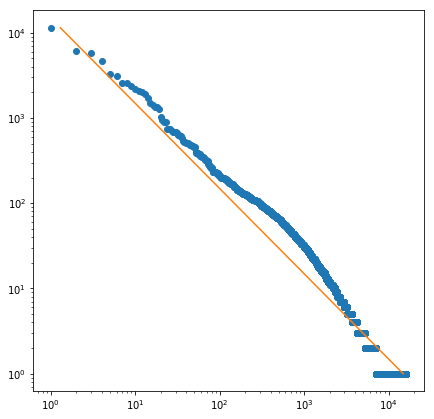

In [91]:
# Observei que os tokens com stemming tendem a ter pouca diversidade e corresponder pouco ao que de fato espera, estando mais
# longe do que se espera no rank-freq. Logo, para esse conjunto de tokens, utilizar stemming não vai auxilizar muito na busca,
# e talvez até problematizar.

counter_stemming_tokens = Counter(stemming_tokens)
counter_stemming_tokens_ordenados_ocorrencia = counter_stemming_tokens.most_common()
total_ocorrencia_stemming_tokens = len(stemming_tokens)

frequencias = [ocorrencia for nome, ocorrencia in counter_stemming_tokens_ordenados_ocorrencia]
frequencias_medias = map(lambda frequencia: float(frequencia) / total_ocorrencia_stemming_tokens, frequencias)
ranking_total = range(1, len(frequencias) + 1)
frequencias_porcentagem = map(lambda frequencia: frequencia * 100, frequencias_medias)
pr_r = map(lambda (i, frequencia_media): (i+1) * frequencia_media, enumerate(frequencias_medias))

f, ax = plt.subplots(figsize=(7,7))
ax.set(xscale="log", yscale="log")

predicao = np.mean(pr_r) / frequencias_medias

plt.plot(ranking_total, frequencias, linestyle="", marker="o")
plt.plot(predicao, frequencias, linestyle="-", marker="")

plt.show()